https://github.com/KerasKorea/KEKOxTutorial/blob/master/10_Fashion-MNIST%20with%20tf.Keras/10_fashion_mnist_keras.ipynb

In [1]:
import tensorflow as tf
import os
import numpy as np

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensorflow\python\framework

1 Physical CPU, 1 Logical CPU


C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\Anaconda3\envs\test\lib\site-packages\tensor

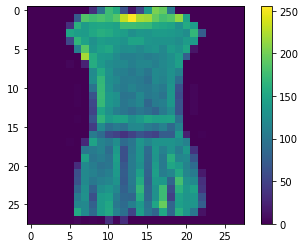

60000
60000
10000
10000


In [2]:
import matplotlib.pyplot as plt

learning_rate = 0.001
batch_size = 100
training_epochs = 15
nb_classes = 10

mnist = tf.keras.datasets.mnist

# read dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# x_train 이미지 하나 출력하기
plt.figure()
plt.imshow(x_train[3])
plt.colorbar()
plt.grid(False)
plt.show()

print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))


# 데이터를 학습/평가/테스트 셋으로 나누기
## Training data(학습 데이터) - 모델을 학습에 사용하는 데이터
## Validation data(검증 데이터) - 하이퍼파라미터를 튜닝하고 모델들을 검증하기 위해 사용하는 데이터
## Test data(테스트 데이터) - 검증 셋으로 모델의 초기 검사를 마친 후에, 모델을 테스트하는 데 사용하는 데이터

In [3]:
# 학습 데이터 셋을 학습 / 평가 셋으로 나눈다. (# 학습 셋: 55,000, 검증 셋: 5000)
# x_train, y_train = 60000 에서 x_train, y_train = 55,000 / x_valid, y_valid = 5000으로 나눔
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# 입력 이미지의 크기를 (28, 28) 에서 (28, 28, 1) 로 배열 차원을 변경(reshape)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# 레이블에 원-핫 인코딩 적용 
# 원-핫 벡터는 단 하나의 차원에서만 1이고, 나머지 차원에서는 0인 벡터입니다.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 학습 셋 크기
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# 학습용, 검증용, 테스트용 데이터셋의 개수
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [4]:
model = tf.keras.Sequential()

# 신경망의 첫 번째 레이어에서 입력 데이터 크기를 정의해야 합니다.
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# model.summary()를 통해 모델을 살펴보세요.
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
____

In [5]:
# 모델 compile(loss, optimizer 등 설정)
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
# 훈련시키면서 가장 정확도가 높은 모델 저장하는 방법 : ModelCheckpoint
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

reLR = ReduceLROnPlateau(patience=100,verbose=1,factor=0.5) #learning rate scheduler
es = EarlyStopping(patience=160, verbose=1)
checkpointer = ModelCheckpoint(filepath='D:/DACON_MNIST/MNIST_Fashion/model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer,es,reLR])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.3234 - acc: 0.8810- ET
Epoch 00001: val_loss improved from inf to 0.26211, saving model to D:/DACON_MNIST/MNIST_Fashion/model.weights.best.hdf5
55000/55000 [==============================] - 33s 605us/sample - loss: 0.3234 - acc: 0.8810 - val_loss: 0.2621 - val_acc: 0.9054
Epoch 2/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.3143 - acc: 0.8837
Epoch 00002: val_loss improved from 0.26211 to 0.24914, saving model to D:/DACON_MNIST/MNIST_Fashion/model.weights.best.hdf5
55000/55000 [==============================] - 31s 564us/sample - loss: 0.3143 - acc: 0.8837 - val_loss: 0.2491 - val_acc: 0.9086
Epoch 3/10
54912/55000 [============================>.] - ETA: 0s - loss: 0.3086 - acc: 0.8848
Epoch 00003: val_loss improved from 0.24914 to 0.24312, saving model to D:/DACON_MNIST/MNIST_Fashion/model.weights.best.hdf5
55000/55000 [==================

In [13]:
# 가장 높은 검증 정확도의 가중치 불러오기
model.load_weights('D:/DACON_MNIST/MNIST_Fashion/model.weights.best.hdf5')

In [14]:
# 테스트 셋을 통해 모델 평가
score = model.evaluate(x_test, y_test, verbose=0)

# 테스트 정확도
print('\n', 'Test accuracy:', score[1])



 Test accuracy: 0.9083


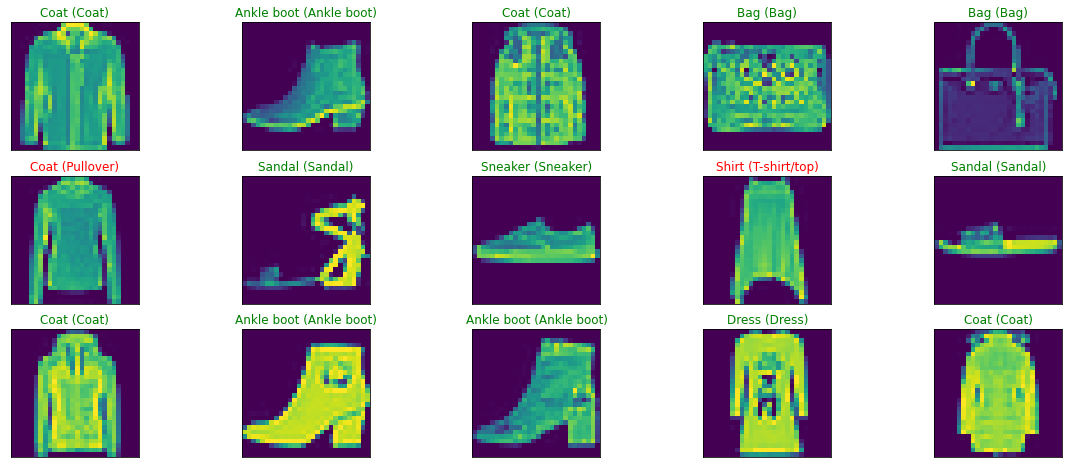

In [15]:
y_hat = model.predict(x_test)

fashion_mnist_labels = ["T-shirt/top",  # 인덱스 0
                        "Trouser",      # 인덱스 1
                        "Pullover",     # 인덱스 2 
                        "Dress",        # 인덱스 3 
                        "Coat",         # 인덱스 4
                        "Sandal",       # 인덱스 5
                        "Shirt",        # 인덱스 6 
                        "Sneaker",      # 인덱스 7 
                        "Bag",          # 인덱스 8 
                        "Ankle boot"]   # 인덱스 9
# 무작위 샘플로 10 개의 테스트 이미지와 예측 레이블 및 실제 레이블을 그려줍니다.
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # 각각의 이미지를 보여줌
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # 각각의 이미지에 예측레이블 (실제레이블) 표시
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))